In [1]:
from functions import *

In [2]:
linewidth=0.15

In [3]:
n = 8
T = 6
show_ticks = False
m = RandomIsingModel(n, local_fields=False, seed=2)
print(m)

Ising model information:
Number of spins: 8
External fields (h): [0. 0. 0. 0. 0. 0. 0. 0.]
Interaction matrix (J):
[[ 0.00000000e+00 -5.62668272e-02 -2.13619610e+00  1.64027081e+00
  -1.79343559e+00 -8.41747366e-01  5.02881417e-01 -1.24528809e+00]
 [-5.62668272e-02  0.00000000e+00  5.51454045e-01  2.29220801e+00
   4.15393930e-02 -1.11792545e+00  5.39058321e-01 -5.96159700e-01]
 [-2.13619610e+00  5.51454045e-01  0.00000000e+00  9.02525097e-03
  -8.78107893e-01 -1.56434170e-01  2.56570452e-01 -9.88779049e-01]
 [ 1.64027081e+00  2.29220801e+00  9.02525097e-03  0.00000000e+00
  -1.42121723e+00 -1.53495196e-01 -2.69056960e-01  2.23136679e+00]
 [-1.79343559e+00  4.15393930e-02 -8.78107893e-01 -1.42121723e+00
   0.00000000e+00 -8.44213704e-01  9.76147160e-06  5.42352572e-01]
 [-8.41747366e-01 -1.11792545e+00 -1.56434170e-01 -1.53495196e-01
  -8.44213704e-01  0.00000000e+00  6.11340780e-01  4.79705919e-02]
 [ 5.02881417e-01  5.39058321e-01  2.56570452e-01 -2.69056960e-01
   9.76147160e-06  6.

# Lexicographic order

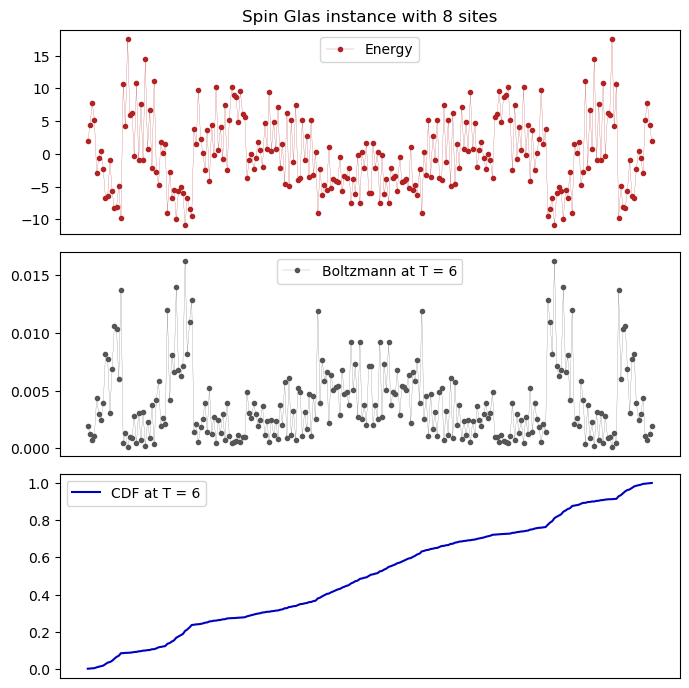

In [4]:
x = [int_to_bin(i, n) for i in range(2**n)]
boltzmann = np.exp(-m.E / T) / sum(np.exp(-m.E / T))

plt.figure(figsize=(7,7))
plt.subplot(311)
plt.plot(x, m.E, '.-', linewidth=linewidth, color=red, label='Energy')
plt.title(f'Spin Glas instance with {n} sites')
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
plt.legend()

plt.subplot(312)
plt.plot(x, boltzmann, '.-', linewidth=linewidth, color=dark_grey, label=f'Boltzmann at T = {T}')
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
# plt.ylim(-0.05, max(boltzmann)+0.1)
# plt.axhline(0, alpha=0.4, color=grey, zorder=-1)
plt.legend()

plt.subplot(313)
plt.plot(x, np.cumsum(boltzmann), label=f'CDF at T = {T}', color=blue)
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
plt.legend()

plt.tight_layout()
plt.show()

# Sorted by energy

In [5]:
E_sorted = np.array([E for E,_ in sorted(zip(m.E, x))])
x_sorted = [x for _,x in sorted(zip(m.E, x))]

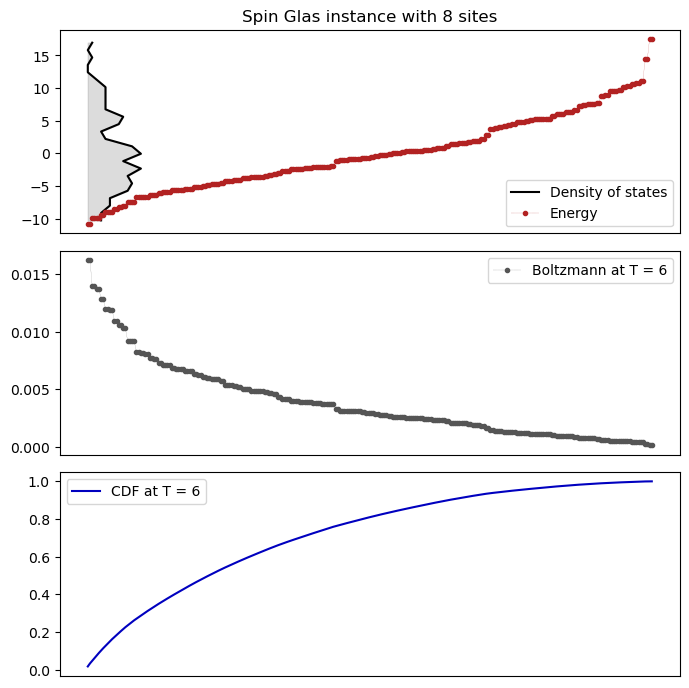

In [6]:
boltzmann_sorted = np.exp(-E_sorted / T) / sum(np.exp(-E_sorted / T))

plt.figure(figsize=(7,7))
plt.subplot(311)
plt.title(f'Spin Glas instance with {n} sites')
h,e = np.histogram(E_sorted, bins=25)
step = e[1] - e[0]
e_mids = e[:-1] + step/2
plt.plot(h, e_mids, color=black, label='Density of states')
plt.fill_betweenx(e_mids, h, color=grey, alpha=0.4)
plt.plot(x_sorted, E_sorted, '.--', linewidth=linewidth, color=red, label='Energy')

if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
plt.legend()

plt.subplot(312)
plt.plot(x_sorted, boltzmann_sorted, '.--', linewidth=linewidth, color=dark_grey, label=f'Boltzmann at T = {T}')
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
# plt.ylim(-0.05, max(boltzmann_sorted)+0.1)
# plt.axhline(0, alpha=0.4, color=grey, zorder=-1)
plt.legend()

plt.subplot(313)
plt.plot(x_sorted, np.cumsum(boltzmann_sorted), label=f'CDF at T = {T}', color=blue)
if show_ticks:
    plt.xticks(rotation=70)
else: 
    plt.xticks([])
plt.legend()

plt.tight_layout()
plt.show()

Density of states is expected to be Gaussian. Hence, sorted energy values correspond to the Gaussian CDF.